<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [1]:
import numpy as np
import pandas as pd
import librosa
import os
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [ ]:
!unzip -q /content/recordings.zip

In [ ]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
all_files = sorted(os.listdir('/content/recordings'))
print(all_files[:10])

['0_jackson_0.wav', '0_jackson_1.wav', '0_jackson_10.wav', '0_jackson_11.wav', '0_jackson_12.wav', '0_jackson_13.wav', '0_jackson_14.wav', '0_jackson_15.wav', '0_jackson_16.wav', '0_jackson_17.wav']


<font size=4>Grader function 1 </font>

In [ ]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [ ]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
df_audio = pd.DataFrame({'path':all_files})
df_audio['label'] = df_audio['path'].apply(lambda x: int(x[0]))
df_audio['path'] = df_audio['path'].apply(lambda x: '/content/recordings/'+x)
df_audio.head()

,path,label
0,/content/recordings/0_jackson_0.wav,0
1,/content/recordings/0_jackson_1.wav,0
2,/content/recordings/0_jackson_10.wav,0
3,/content/recordings/0_jackson_11.wav,0
4,/content/recordings/0_jackson_12.wav,0


In [ ]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [ ]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [ ]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [ ]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'], df_audio['label'], test_size=0.3,stratify = df_audio['label'], random_state=45)

<font size=4>Grader function 3 </font>

In [ ]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [ ]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [ ]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

def processing(X):
    processed = []
    paths = X.values
    for path in paths:
        row = load_wav(path, get_duration=True)
        processed.append(row)
    processed = np.array(processed,dtype='object')
    return pd.DataFrame(processed, columns=['raw_data', 'duration'])

X_train_processed = processing(X_train)
X_test_processed = processing(X_test)

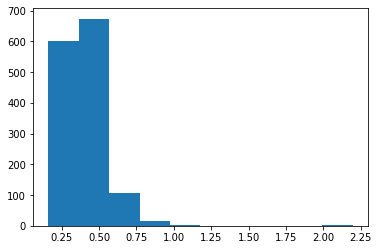

In [ ]:
#plot the histogram of the duration for trian
X_train_processed['duration'].hist(grid = False)

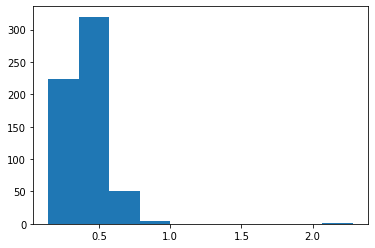

In [ ]:
#plot the histogram of the duration for test
X_test_processed['duration'].hist(grid = False)

In [ ]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 

duration = X_train_processed['duration']
for i in range(0,110,10):
  print(f'{i} th percentile is {np.percentile(duration, i)}')

0 th percentile is 0.16104308390022676
10 th percentile is 0.25848072562358276
20 th percentile is 0.2974331065759637
30 th percentile is 0.3297777777777778
40 th percentile is 0.3569160997732426
50 th percentile is 0.38945578231292516
60 th percentile is 0.41328798185941046
70 th percentile is 0.4444671201814059
80 th percentile is 0.4826848072562358
90 th percentile is 0.5531655328798186
100 th percentile is 2.195918367346939


In [ ]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,101):
  print(f'{i} th percentile is {np.percentile(duration, i)}')

90 th percentile is 0.5531655328798186
91 th percentile is 0.5669832199546486
92 th percentile is 0.5790349206349206
93 th percentile is 0.599510657596372
94 th percentile is 0.611208163265306
95 th percentile is 0.6316009070294784
96 th percentile is 0.6431455782312925
97 th percentile is 0.6635741496598639
98 th percentile is 0.6957514739229022
99 th percentile is 0.79601179138322
100 th percentile is 2.195918367346939


<font size=4>Grader function 4 </font>

In [ ]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [ ]:
max_length  = 17640

In [ ]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool
def mask(X):
  x_mask = []
  for i in X:
    x_mask.append([True if j !=0 else False for j in i])
  return np.array(x_mask)

X_train_pad_seq = pad_sequences(X_train_processed['raw_data'].values, maxlen = 17640, padding='post', truncating = 'post', dtype = 'float32')
X_test_pad_seq = pad_sequences(X_test_processed['raw_data'].values, maxlen = 17640, padding='post', truncating = 'post', dtype = 'float32')

X_train_mask = mask(X_train_pad_seq)
X_test_mask = mask(X_test_pad_seq)

<font size=4>Grader function 5 </font>

In [ ]:
# X_processed = X_train_processed['raw_data'].values
# X_pad_seq = pad_sequences(X_processed, maxlen = 17640, padding='post', truncating = 'post', dtype = 'float32')
X_train_pad_seq.shape

(1400, 17640)

In [4]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

In [ ]:
with open('data.pkl','wb') as f:
  pickle.dump(X_train_pad_seq, f)
  pickle.dump(X_test_pad_seq, f)
  pickle.dump(X_train_mask, f)
  pickle.dump(X_test_mask, f)
  pickle.dump(y_train, f)
  pickle.dump(y_test, f)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/MyDrive/assgn30/data.pkl','rb') as f:
  X_train_pad_seq = pickle.load(f)
  X_test_pad_seq = pickle.load(f)
  X_train_mask = pickle.load(f)
  X_test_mask = pickle.load(f)
  y_train = pickle.load(f)
  y_test = pickle.load(f)

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

In [5]:
from tensorflow.keras.layers import Input, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
X_tr = np.expand_dims(X_train_pad_seq, axis=-1)
X_te = np.expand_dims(X_test_pad_seq, axis=-1)

print(X_tr.shape,X_te.shape)

(1400, 17640, 1) (600, 17640, 1)


In [ ]:
## as discussed above, please write the LSTM
tf.keras.backend.clear_session
input = Input(shape=(17640,1), name='input_layer', dtype = 'float32')
input_mask = Input(shape=(17640), name='input_mask', dtype = 'bool')
lstm = LSTM(25)(input, mask = input_mask)
dense = Dense(50, activation='relu')(lstm)
dense_1 = Dense(10, activation='softmax')(dense)

In [ ]:
model = Model(inputs = [input,input_mask], outputs = dense_1)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 25)           2700        input_layer[0][0]                
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           1300        lstm[0][0]                   

In [ ]:
#train your model
def micro_f1_score(y_true,y_pred):
  return f1_score(y_true, np.argmax(y_pred,axis=1), average='micro')

def micro_f1(y_true, y_pred):
  return tf.py_function(func=micro_f1_score, inp=[y_true,y_pred], Tout=tf.float32)

loss = tf.losses.SparseCategoricalCrossentropy()
acc = tf.metrics.SparseCategoricalAccuracy()

Adam = tf.optimizers.Adam()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(optimizer=Adam, loss = loss, metrics=[micro_f1, acc])

history = model.fit(x=[X_tr, X_train_mask], y=y_train, batch_size=32, epochs=50, \
                    validation_data  = ([X_te, X_test_mask], y_test), callbacks=[early_stopping])

Epoch 1/50
44/44 [==============================] - 57s 517ms/step - loss: 2.3030 - micro_f1: 0.0952 - sparse_categorical_accuracy: 0.0952 - val_loss: 2.3026 - val_micro_f1: 0.1025 - val_sparse_categorical_accuracy: 0.1017
Epoch 2/50
44/44 [==============================] - 21s 471ms/step - loss: 2.3029 - micro_f1: 0.1020 - sparse_categorical_accuracy: 0.1020 - val_loss: 2.3026 - val_micro_f1: 0.0981 - val_sparse_categorical_accuracy: 0.0983
Epoch 3/50
44/44 [==============================] - 21s 478ms/step - loss: 2.3027 - micro_f1: 0.1013 - sparse_categorical_accuracy: 0.1013 - val_loss: 2.3026 - val_micro_f1: 0.0992 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/50
44/44 [==============================] - 21s 489ms/step - loss: 2.3028 - micro_f1: 0.1002 - sparse_categorical_accuracy: 0.1002 - val_loss: 2.3026 - val_micro_f1: 0.0992 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/50
44/44 [==============================] - 21s 467ms/step - loss: 2.3027 - micro_f1: 0.1101 - spars

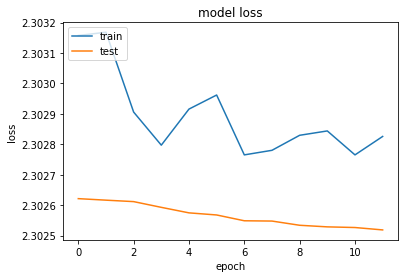

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

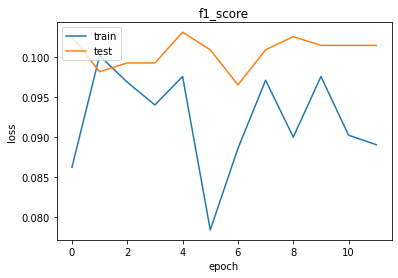

In [ ]:
plt.plot(history.history['micro_f1'])
plt.plot(history.history['val_micro_f1'])
plt.title('f1_score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [6]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=22050, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [7]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram = np.array(list(map(convert_to_spectrogram, X_train_pad_seq)))
X_test_spectrogram = np.array(list(map(convert_to_spectrogram, X_test_pad_seq)))

<font size=4>Grader function 6 </font>

In [8]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (#., time_steps, features) average the output of every time step i.e, you should get (#.,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

In [13]:
tf.keras.backend.clear_session()
input = Input(shape=(64,35), name='input_layer', dtype = 'float32')
lstm = LSTM(25, return_sequences=True)(input)
average = GlobalAveragePooling1D(data_format='channels_first')(lstm)
dense = Dense(50, activation='relu')(average)
dense_1 = Dense(10, activation='softmax')(dense)

model = Model(inputs=input, outputs=dense_1)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 35)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 25)            6100      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 9,860
Trainable params: 9,860
Non-trainable params: 0
_________________________________________________________________


In [14]:
def micro_f1_score(y_true,y_pred):
  return f1_score(y_true, np.argmax(y_pred,axis=1), average='micro')

def micro_f1(y_true, y_pred):
  return tf.py_function(func=micro_f1_score, inp=[y_true,y_pred], Tout=tf.float32)

loss = tf.losses.SparseCategoricalCrossentropy()
acc = tf.metrics.SparseCategoricalAccuracy()

Adam = tf.optimizers.Adam()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(optimizer=Adam, loss = loss, metrics=[micro_f1, acc])

history = model.fit(x=X_train_spectrogram, y=y_train, batch_size=32, epochs=50, \
                    validation_data  = (X_test_spectrogram, y_test))

Epoch 1/50
44/44 [==============================] - 2s 19ms/step - loss: 2.2958 - micro_f1: 0.1328 - sparse_categorical_accuracy: 0.1328 - val_loss: 2.2778 - val_micro_f1: 0.1880 - val_sparse_categorical_accuracy: 0.1883
Epoch 2/50
44/44 [==============================] - 0s 9ms/step - loss: 2.2668 - micro_f1: 0.2003 - sparse_categorical_accuracy: 0.2004 - val_loss: 2.2365 - val_micro_f1: 0.1941 - val_sparse_categorical_accuracy: 0.1933
Epoch 3/50
44/44 [==============================] - 0s 9ms/step - loss: 2.2035 - micro_f1: 0.2230 - sparse_categorical_accuracy: 0.2230 - val_loss: 2.1466 - val_micro_f1: 0.2275 - val_sparse_categorical_accuracy: 0.2267
Epoch 4/50
44/44 [==============================] - 0s 9ms/step - loss: 2.0792 - micro_f1: 0.2790 - sparse_categorical_accuracy: 0.2791 - val_loss: 1.9931 - val_micro_f1: 0.2714 - val_sparse_categorical_accuracy: 0.2717
Epoch 5/50
44/44 [==============================] - 0s 9ms/step - loss: 1.9403 - micro_f1: 0.3244 - sparse_categorical_

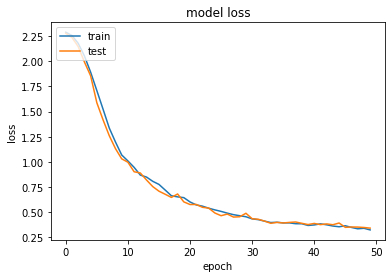

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

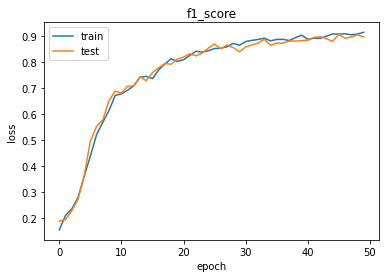

In [16]:
plt.plot(history.history['micro_f1'])
plt.plot(history.history['val_micro_f1'])
plt.title('f1_score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [ ]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [ ]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [ ]:
len(aug_temp)

9

As discussed above, for one data point, we will get 9 augmented data points.  

Split data into train and test (80-20 split)

We have 2000 data points(1600 train points, 400 test points) 

Do augmentation only on train data, after augmentation we will get 14400 train points. 

do the above steps i.e training with raw data and spectrogram data with augmentation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'], df_audio['label'], test_size=0.2,stratify = df_audio['label'], random_state=45)

In [ ]:
X_train_processed = []
paths = X_train.values
for path in paths:
  X_train_processed += generate_augmented_data(path)
X_train_processed = np.array(X_train_processed, dtype = 'object')

X_test_processed = processing(X_test)
X_test_processed  = X_test_processed['raw_data'].values
y_train = y_train.loc[y_train.index.repeat(9)]
print(X_train_processed.shape, y_train.shape)
print(X_test_processed.shape, y_test.shape)

(14400,) (14400,)
(400,) (400,)


In [18]:
# def mask(X):
#   x_mask = []
#   for i in X:
#     x_mask.append([True if j !=0 else False for j in i])
#   return np.array(x_mask)

# X_train_pad_seq  = pad_sequences(X_train_processed, maxlen = 17640, padding='post', truncating='post', dtype='float32')
# X_test_pad_seq  = pad_sequences(X_test_processed, maxlen = 17640, padding='post', truncating='post', dtype='float32')

# X_train_mask = mask(X_train_pad_seq)
# X_test_mask = mask(X_test_pad_seq)

print(X_train_pad_seq.shape, X_test_pad_seq.shape)
print(X_train_mask.shape, X_test_mask.shape)

(14400, 17640) (400, 17640)
(14400, 17640) (400, 17640)


In [ ]:
with open('/content/drive/MyDrive/assgn30/aug_data.pkl','wb') as f:
  pickle.dump(X_train_pad_seq, f)
  pickle.dump(X_test_pad_seq, f)
  pickle.dump(X_train_mask, f)
  pickle.dump(X_test_mask, f)
  pickle.dump(y_train, f)
  pickle.dump(y_test, f)

In [17]:
with open('/content/drive/MyDrive/assgn30/aug_data.pkl','rb') as f:
  X_train_pad_seq = pickle.load(f)
  X_test_pad_seq = pickle.load(f)
  X_train_mask = pickle.load(f)
  X_test_mask = pickle.load(f)
  y_train = pickle.load(f)
  y_test = pickle.load(f)

In [ ]:
X_tr = np.expand_dims(X_train_pad_seq, axis=-1)
X_te = np.expand_dims(X_test_pad_seq, axis=-1)

print(X_tr.shape,X_te.shape)

(14400, 17640, 1) (400, 17640, 1)


In [ ]:
input = Input(shape=(17640,1), name='input_layer', dtype = 'float32')
input_mask = Input(shape=(17640), name='input_mask', dtype = 'bool')
lstm = LSTM(25)(input, mask = input_mask)
dense = Dense(50, activation='relu')(lstm)
dense_1 = Dense(10, activation='softmax')(dense)

model = Model(inputs = [input, input_mask], outputs= dense_1)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 25)           2700        input_layer[0][0]                
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 50)           1300        lstm_1[0][0]               

In [ ]:
model.compile(optimizer=Adam, loss = loss, metrics=[micro_f1, acc])

history = model.fit(x=[X_tr, X_train_mask], y=y_train, batch_size=32, epochs=50, \
                    validation_data  = ([X_te, X_test_mask], y_test), callbacks=[early_stopping])

Epoch 1/50
450/450 [==============================] - 195s 427ms/step - loss: 2.3033 - micro_f1: 0.0972 - sparse_categorical_accuracy: 0.0979 - val_loss: 2.3026 - val_micro_f1: 0.1034 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/50
450/450 [==============================] - 192s 426ms/step - loss: 2.3027 - micro_f1: 0.0975 - sparse_categorical_accuracy: 0.0975 - val_loss: 2.3026 - val_micro_f1: 0.1034 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/50
450/450 [==============================] - 190s 423ms/step - loss: 2.3027 - micro_f1: 0.0971 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.3026 - val_micro_f1: 0.0986 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/50
450/450 [==============================] - 189s 421ms/step - loss: 2.3028 - micro_f1: 0.0920 - sparse_categorical_accuracy: 0.0920 - val_loss: 2.3026 - val_micro_f1: 0.1034 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/50
450/450 [==============================] - 192s 427ms/step - loss: 2.3027 - micro_f1:

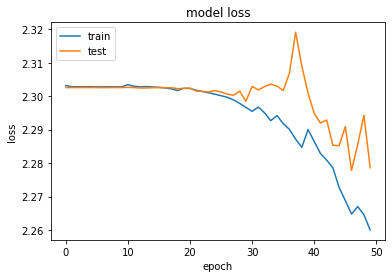

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

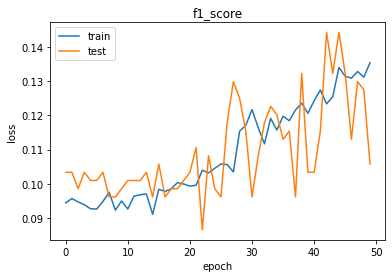

In [ ]:
plt.plot(history.history['micro_f1'])
plt.plot(history.history['val_micro_f1'])
plt.title('f1_score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###4. Augmenting and using spectrogram

In [19]:
X_train_spectrogram = np.array(list(map(convert_to_spectrogram, X_train_pad_seq)))
X_test_spectrogram = np.array(list(map(convert_to_spectrogram, X_test_pad_seq)))

In [20]:
print(X_train_spectrogram.shape, X_test_spectrogram.shape)

(14400, 64, 35) (400, 64, 35)


In [22]:
input = Input(shape=(64,35), name='input_layer', dtype = 'float32')
lstm = LSTM(25, return_sequences=True)(input)
average = GlobalAveragePooling1D(data_format='channels_first')(lstm)
dense = Dense(50, activation='relu')(average)
dense_1 = Dense(10, activation='softmax')(dense)

model = Model(inputs=input, outputs=dense_1)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 35)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64, 25)            6100      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 9,860
Trainable params: 9,860
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=Adam, loss = loss, metrics=[micro_f1, acc])

history = model.fit(x=X_train_spectrogram, y=y_train, batch_size=32, epochs=50, \
                    validation_data  = (X_test_spectrogram, y_test))

Epoch 1/50
450/450 [==============================] - 4s 7ms/step - loss: 1.9536 - micro_f1: 0.2913 - sparse_categorical_accuracy: 0.3841 - val_loss: 1.0519 - val_micro_f1: 0.6611 - val_sparse_categorical_accuracy: 0.6625
Epoch 2/50
450/450 [==============================] - 3s 6ms/step - loss: 1.0389 - micro_f1: 0.6447 - sparse_categorical_accuracy: 0.6447 - val_loss: 0.8549 - val_micro_f1: 0.7308 - val_sparse_categorical_accuracy: 0.7275
Epoch 3/50
450/450 [==============================] - 3s 6ms/step - loss: 0.8484 - micro_f1: 0.7028 - sparse_categorical_accuracy: 0.7028 - val_loss: 0.7616 - val_micro_f1: 0.7620 - val_sparse_categorical_accuracy: 0.7575
Epoch 4/50
450/450 [==============================] - 3s 6ms/step - loss: 0.7511 - micro_f1: 0.7381 - sparse_categorical_accuracy: 0.7381 - val_loss: 0.6984 - val_micro_f1: 0.7692 - val_sparse_categorical_accuracy: 0.7675
Epoch 5/50
450/450 [==============================] - 3s 6ms/step - loss: 0.6784 - micro_f1: 0.7653 - sparse_cat

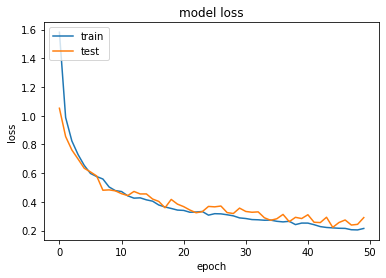

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

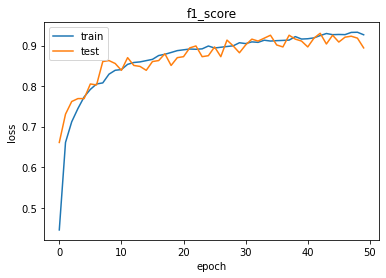

In [25]:
plt.plot(history.history['micro_f1'])
plt.plot(history.history['val_micro_f1'])
plt.title('f1_score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Q] Why micro f1-score is equal to accuracy?

In micro f1_score we calculate a global confusion matrix instead of having cm for each class and further proof is shown in following image.

<img src = 'IMG_20210328_030147.jpg'>